# Merging data frames, cleaning tweets data and compiling final data frame for analyses

In [1]:
# Initial imports
# import os
import pandas as pd
from pathlib import Path
import numpy as np
from datetime import date, timedelta
from matplotlib import pyplot

In [2]:
# Display all the text in columns
# pd.set_option('display.max_colwidth',None)
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None

## Elon Musks Tweet Data
#### Start cleaning data frame for NLP and Tesla and SpaceX Flags

In [3]:
# Import csv file with tweets for elon musk
file_name='elon_tweets.csv'
file_path=Path(f"../Resources/{file_name}")
tweets_df = pd.read_csv(file_path,parse_dates=True, infer_datetime_format=True) # we do not do date as index just yet


# we change the name to date column - we will drop this field later. We need a date field that shows off market hour tweets as t+1 
tweets_df.rename(columns={'date':'date original'},inplace=True)
tweets_df['date original']=pd.to_datetime(tweets_df['date original'])

# Make tweets made after market hours fall into the following day
# Define market hour limit as everything after 16hs 00 min 00 sec
min_hour=16
min_minute=0
min_second=0

# we create the new field equalt to date original 
tweets_df['date']=tweets_df['date original'].copy()

# we add 1 day to date original if the tweet occured off market hours
tweets_df.loc[(tweets_df['date original'].dt.hour>=min_hour) & (tweets_df['date original'].dt.minute>min_minute) & (tweets_df['date original'].dt.second>min_second), 'date'] = tweets_df['date original']+timedelta(days=1)

# Drop original date and make the new date column as index
tweets_df.drop(columns={'date original'}, inplace=True)
tweets_df.set_index('date', inplace=True)

# We eliminate the seconds from Tweets data frame
tweets_df.index = tweets_df.index.date

# Create new data tweet with aggregated info
new_tweets_df=pd.DataFrame()
new_tweets_df['tweet'] = tweets_df['tweet'].groupby(tweets_df.index).agg(' '.join).sort_index()
new_tweets_df['tweet count']=tweets_df['tweet'].groupby(tweets_df.index).count().sort_index()
new_tweets_df['number likes']=tweets_df['nlikes'].groupby(tweets_df.index).sum().sort_index()
new_tweets_df['number replies']=tweets_df['nreplies'].groupby(tweets_df.index).sum().sort_index()
new_tweets_df['number retweets']=tweets_df['nretweets'].groupby(tweets_df.index).sum().sort_index()
tweets_df.head(20)

,tweet,nlikes,nreplies,nretweets
2021-01-18,@kellyreid The rate-limiting part or process in cell production is constantly changing,3120,256,119
2021-01-18,"@FrancisSuarez @CityofMiami Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but @boringcompany road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with @RonDeSantisFL about tunnels last week. If Governor &amp; Mayor want this done, we will do it.",8861,1566,938
2021-01-18,"@RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made",6115,336,463
2021-01-18,@lexfridman @tegmark Tegmark is an exceptionally smart &amp; good human,8142,223,232
2021-01-18,"@OwenSparks_ The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys",5020,210,218
2021-01-18,Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem.,131699,5698,10424
2021-01-18,@p_ferragu Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in.,6171,625,274
2021-01-18,@tobyliiiiiiiiii @Erdayastronaut For sure,3852,106,79
2021-01-18,@Erdayastronaut Glad you’re ok,8142,114,150
2021-01-18,@Virgin_Orbit Congratulations!,4085,84,165


In [4]:
new_tweets_df.tail()

,tweet,tweet count,number likes,number replies,number retweets
2021-01-14,"@skorusARK Prototypes are easy, volume production is hard, positive cash flow is excruciating @Tesla Physics @Erdayastronaut Detanking &amp; inspections now. Good progress towards our “Hop in &amp; go to Mars!” goal. All three static fires completed &amp; no RUDs! @justpaulinelol @Erdayastronaut @SpaceX Wow, a lot has happened in 10 years! @OfficialJlipper Fair enough haha https://t.co/ho7yGXAS3a",7,559632,14544,38701
2021-01-15,"@SuperclusterHQ @w00ki33 Fallout New Texas @Breedlove22 @benmezrich Only Chuck Norris can divide by zero @Cerberu21014829 @Breedlove22 @benmezrich Good point @Breedlove22 @benmezrich The thing we call money is just an information system for labor allocation. What actually matters is making goods &amp; providing services. We should look at currencies from an information theory standpoint. Whichever has least error &amp; latency will win. Monty Python is amazing https://t.co/UJq94IWT88 @RationalEtienne @tobyliiiiiiiiii @Erdayastronaut They sure can twist the knife in that show! @tobyliiiiiiiiii @Erdayastronaut Probably wise @Erdayastronaut We’re making major improvements to ease of engine swap. Needs to be a few hours at most. @PPathole @johnkrausphotos @SpaceX Two of the engines need slight repairs, so will be switched out @johnkrausphotos @SpaceX Nice shot @realOmarAbdalah We don’t have high school internships, but please apply when you’re in college!",11,169339,9381,12439
2021-01-16,@DMC_Ryan @C_R_H_M @Tesla Cybertruck doesn’t need a garage @DMC_Ryan @Tesla It will be awesome @owenshift Good point @signalapp Your server-side code is doing too much @Wikipedia Happy birthday Wikipedia! So glad you exist. @TheOnion Guess you been watching Cobra Kai,6,127906,3605,4135
2021-01-17,@MrBeastYT I whistle,1,125897,1542,2171
2021-01-18,"@kellyreid The rate-limiting part or process in cell production is constantly changing @FrancisSuarez @CityofMiami Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but @boringcompany road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with @RonDeSantisFL about tunnels last week. If Governor &amp; Mayor want this done, we will do it. @RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made @lexfridman @tegmark Tegmark is an exceptionally smart &amp; good human @OwenSparks_ The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. @p_ferragu Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. @tobyliiiiiiiiii @Erdayastronaut For sure @Erdayastronaut Glad you’re ok @Virgin_Orbit Congratulations! @teslaownersSV This is a good one",11,199707,9709,13329


In [5]:
# Import csv file with tweets for elon musk
file_name='elon_tweets.csv'
file_path=Path(f"../Resources/{file_name}")
tweets_df = pd.read_csv(file_path,parse_dates=True, infer_datetime_format=True) # we do not do date as index just yet


# we change the name to date column - we will drop this field later. We need a date field that shows off market hour tweets as t+1 
tweets_df.rename(columns={'date':'date original'},inplace=True)
tweets_df['date original']=pd.to_datetime(tweets_df['date original'])

# Make tweets made after market hours fall into the following day
# Define market hour limit as everything after 16hs 00 min 00 sec
min_hour=16
min_minute=0
min_second=0

# we create the new field equalt to date original 
tweets_df['date']=tweets_df['date original'].copy()

# we add 1 day to date original if the tweet occured off market hours
tweets_df.loc[(tweets_df['date original'].dt.hour>=min_hour) & (tweets_df['date original'].dt.minute>min_minute) & (tweets_df['date original'].dt.second>min_second), 'date'] = tweets_df['date original']+timedelta(days=1)

# Drop original date and make the new date column as index
tweets_df.drop(columns={'date original'}, inplace=True)
tweets_df.set_index('date', inplace=True)

# We eliminate the seconds from Tweets data frame
tweets_df.index = tweets_df.index.date

# Cleaning tweets
# Multiple tweets per day in 1
#aggregate tweees, sum number of tweets per day, sumnumber of likes per tweet, etc
new_tweets_df = tweets_df.groupby(tweets_df.index).agg(' '.join).sort_index()
new_tweets_df['tweet count']=tweets_df['tweet'].groupby(tweets_df.index).count().sort_index()
new_tweets_df['tweet'] = tweets_df['tweet'].groupby(tweets_df.index).agg(' '.join).sort_index()
new_tweets_df['tweet count']=tweets_df['tweet'].groupby(tweets_df.index).count().sort_index()
new_tweets_df['number likes']=tweets_df['nlikes'].groupby(tweets_df.index).sum().sort_index()
new_tweets_df['number replies']=tweets_df['nreplies'].groupby(tweets_df.index).sum().sort_index()
new_tweets_df['number retweets']=tweets_df['nretweets'].groupby(tweets_df.index).sum().sort_index()



## Tesla and QQQ Stock Price Data
### Cleaning and Y generation

In [6]:
file_name='stock_price.csv'
file_path=Path(f"../Resources/{file_name}")
stock_price_df = pd.read_csv(file_path,index_col='date',parse_dates=True, infer_datetime_format=True)

# We create the Ys once the data frame is final

# We do the same format change to data  to make sure that the fields are comparable
stock_price_df.index = stock_price_df.index.date
stock_price_df.head(10)

,TSLA,QQQ,earnings flag
2010-06-29,4.778,39.031284,0
2010-06-30,4.766,38.437302,0
2010-07-01,4.392,38.329292,0
2010-07-02,3.840,38.221321,0
2010-07-06,3.222,38.338306,0
2010-07-07,3.160,39.562256,0
2010-07-08,3.492,39.778240,0
2010-07-09,3.480,40.156231,0
2010-07-12,3.410,40.273220,0
2010-07-13,3.628,40.795197,0


## Merging Dataframes
 * Stock Data + Raw Tweets 

In [7]:
# Join data frames. Outer is used to not leave any data point behind. 
 
merged_df=stock_price_df.join(new_tweets_df,how='outer')
merged_df.index = pd.to_datetime(merged_df.index)

# Keep data starting in Tesla's IPO
merged_df=merged_df.loc['2010-06-29':]

merged_df.tail()
# merged_df.loc['2011-12-01':'2011-12-06'].head(6)

,TSLA,QQQ,earnings flag,tweet,tweet count,number likes,number replies,number retweets
2021-01-16,NaN,NaN,NaN,@DMC_Ryan @C_R_H_M @Tesla Cybertruck doesn’t need a garage @DMC_Ryan @Tesla It will be awesome @owenshift Good point @signalapp Your server-side code is doing too much @Wikipedia Happy birthday Wikipedia! So glad you exist. @TheOnion Guess you been watching Cobra Kai,6.0,127906.0,3605.0,4135.0
2021-01-17,NaN,NaN,NaN,@MrBeastYT I whistle,1.0,125897.0,1542.0,2171.0
2021-01-18,NaN,NaN,NaN,"@kellyreid The rate-limiting part or process in cell production is constantly changing @FrancisSuarez @CityofMiami Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but @boringcompany road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with @RonDeSantisFL about tunnels last week. If Governor &amp; Mayor want this done, we will do it. @RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made @lexfridman @tegmark Tegmark is an exceptionally smart &amp; good human @OwenSparks_ The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. @p_ferragu Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. @tobyliiiiiiiiii @Erdayastronaut For sure @Erdayastronaut Glad you’re ok @Virgin_Orbit Congratulations! @teslaownersSV This is a good one",11.0,199707.0,9709.0,13329.0
2021-01-19,844.549988,316.410004,0.0,NaN,NaN,NaN,NaN,NaN
2021-01-20,850.450012,323.769989,0.0,NaN,NaN,NaN,NaN,NaN


## Cleaning Merged Data Frame
 * Move tweets to next trading day (i.e. push forward tweets made on weekends and holidays)

In [8]:
clean_df=merged_df.copy()

variable_df=clean_df['tweet'].copy

# weekend fix - tweets
clean_df['NO_NaN']=np.where(clean_df['TSLA'].notnull() & clean_df['tweet'].notnull(),clean_df['tweet'],'')
clean_df['NaN1']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet'].notnull().shift(1),clean_df['tweet'].shift(1),'')
clean_df['NaN2']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet'].notnull().shift(1),clean_df['NaN1'].shift(1),'')
clean_df['NaN3']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet'].notnull().shift(1),clean_df['NaN2'].shift(1),'')
clean_df['NaN4']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet'].notnull().shift(1),clean_df['NaN3'].shift(1),'')

clean_df['tweet clean']= \
    clean_df['NO_NaN'][clean_df['TSLA'].notnull()] + ' ' + \
    clean_df['NaN1'][clean_df['TSLA'].notnull()] + ' ' + \
    clean_df['NaN2'][clean_df['TSLA'].notnull()] + ' ' + \
    clean_df['NaN3'][clean_df['TSLA'].notnull()] + ' ' + \
    clean_df['NaN4'][clean_df['TSLA'].notnull()] 

# Drop intermidiate columns created
clean_df.drop(columns=['NO_NaN','NaN1','NaN2','NaN3','NaN4'],inplace=True)


# weekend fix - tweet count; create intermidiate fields that move tweet count fields to the closest next weekday 
clean_df['NO_NaN']=np.where(clean_df['TSLA'].notnull() & clean_df['tweet count'].notnull(),clean_df['tweet count'],0)
clean_df['NaN1']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet count'].notnull().shift(1),clean_df['tweet count'].shift(1),0)
clean_df['NaN2']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet count'].notnull().shift(1),clean_df['NaN1'].shift(1),0)
clean_df['NaN3']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet count'].notnull().shift(1),clean_df['NaN2'].shift(1),0)
# not needed - in case there are 4 non market days in a row
clean_df['NaN4']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['tweet count'].notnull().shift(1),clean_df['NaN3'].shift(1),0)

# summ accross intermidiate fields
clean_df['tweet count clean']= \
    clean_df['NO_NaN'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN1'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN2'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN3'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN4'][clean_df['TSLA'].notnull()].astype(int)

# Drop intermidiate columns created
clean_df.drop(columns=['NO_NaN','NaN1','NaN2','NaN3','NaN4','tweet','tweet count'],inplace=True)




In [9]:
# weekend fix - number likes; create intermidiate fields that move tweet count fields to the closest next weekday 
clean_df['NO_NaN']=np.where(clean_df['TSLA'].notnull() & clean_df['number likes'].notnull(),clean_df['number likes'],0)
clean_df['NaN1']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number likes'].notnull().shift(1),clean_df['number likes'].shift(1),0)
clean_df['NaN2']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number likes'].notnull().shift(1),clean_df['NaN1'].shift(1),0)
clean_df['NaN3']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number likes'].notnull().shift(1),clean_df['NaN2'].shift(1),0)
# not needed - in case there are 4 non market days in a row
clean_df['NaN4']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number likes'].notnull().shift(1),clean_df['NaN3'].shift(1),0)

# summ accross intermidiate fields
clean_df['number likes clean']= \
    clean_df['NO_NaN'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN1'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN2'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN3'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN4'][clean_df['TSLA'].notnull()].astype(int)

# Drop intermidiate columns created
clean_df.drop(columns=['NO_NaN','NaN1','NaN2','NaN3','NaN4','number likes'],inplace=True)


In [10]:
# weekend fix - number likes; create intermidiate fields that move tweet count fields to the closest next weekday 
clean_df['NO_NaN']=np.where(clean_df['TSLA'].notnull() & clean_df['number replies'].notnull(),clean_df['number replies'],0)
clean_df['NaN1']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number replies'].notnull().shift(1),clean_df['number replies'].shift(1),0)
clean_df['NaN2']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number replies'].notnull().shift(1),clean_df['NaN1'].shift(1),0)
clean_df['NaN3']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number replies'].notnull().shift(1),clean_df['NaN2'].shift(1),0)
# not needed - in case there are 4 non market days in a row
clean_df['NaN4']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number replies'].notnull().shift(1),clean_df['NaN3'].shift(1),0)

# summ accross intermidiate fields
clean_df['number replies clean']= \
    clean_df['NO_NaN'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN1'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN2'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN3'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN4'][clean_df['TSLA'].notnull()].astype(int)

# Drop intermidiate columns created
clean_df.drop(columns=['NO_NaN','NaN1','NaN2','NaN3','NaN4','number replies'],inplace=True)

In [11]:
# weekend fix - number likes; create intermidiate fields that move tweet count fields to the closest next weekday 
clean_df['NO_NaN']=np.where(clean_df['TSLA'].notnull() & clean_df['number retweets'].notnull(),clean_df['number retweets'],0)
clean_df['NaN1']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number retweets'].notnull().shift(1),clean_df['number retweets'].shift(1),0)
clean_df['NaN2']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number retweets'].notnull().shift(1),clean_df['NaN1'].shift(1),0)
clean_df['NaN3']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number retweets'].notnull().shift(1),clean_df['NaN2'].shift(1),0)
# not needed - in case there are 4 non market days in a row
clean_df['NaN4']=np.where(clean_df['TSLA'].shift(1).isnull() & clean_df['number retweets'].notnull().shift(1),clean_df['NaN3'].shift(1),0)

# summ accross intermidiate fields
clean_df['number retweets clean']= \
    clean_df['NO_NaN'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN1'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN2'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN3'][clean_df['TSLA'].notnull()].astype(int) + \
    clean_df['NaN4'][clean_df['TSLA'].notnull()].astype(int)

# Drop intermidiate columns created
clean_df.drop(columns=['NO_NaN','NaN1','NaN2','NaN3','NaN4','number retweets'],inplace=True)

In [12]:
# Add NaNs in empty strings
clean_df['tweet clean'].replace(r'^\s*$',np.NaN,inplace=True, regex=True)

# Drop weekends and holidays; i.e. days with no market data
clean_df.dropna(subset=['TSLA'],inplace=True)

clean_df.tail()

,TSLA,QQQ,earnings flag,tweet clean,tweet count clean,number likes clean,number replies clean,number retweets clean
2021-01-13,854.409973,316.040009,0.0,"@NASASpaceflight Sea shanty tiktok takes it to a new level with actual pirate ships @ConnectDotsToo Sure Today at SpaceX is about practicing Starship engine starts. Ship is held down by massive pins while engines are fired. Two starts completed, about to try a third. @Tesmanian_com As promised Legalize comedy @lvladimirovBG You can steal our name/logos &amp; we probably won’t sue you @arstechnica @SciGuySpace We’re just trying to get people to Mars. Help would be appreciated. @lexfridman Suicide is more than double homicide https://t.co/MvWGPs9uQE @lexfridman Absolutely Hey you … Yeah you Queen … You’re gonna make it! 💕💕 https://t.co/LrqdIrbIyd @TheOldManPar @DJSnM @MachinePix Hate to say it, but might be true",11.0,1734427.0,40100.0,213435.0
2021-01-14,845.000000,314.350006,0.0,"@skorusARK Prototypes are easy, volume production is hard, positive cash flow is excruciating @Tesla Physics @Erdayastronaut Detanking &amp; inspections now. Good progress towards our “Hop in &amp; go to Mars!” goal. All three static fires completed &amp; no RUDs! @justpaulinelol @Erdayastronaut @SpaceX Wow, a lot has happened in 10 years! @OfficialJlipper Fair enough haha https://t.co/ho7yGXAS3a",7.0,559632.0,14544.0,38701.0
2021-01-15,826.159973,311.859985,0.0,"@SuperclusterHQ @w00ki33 Fallout New Texas @Breedlove22 @benmezrich Only Chuck Norris can divide by zero @Cerberu21014829 @Breedlove22 @benmezrich Good point @Breedlove22 @benmezrich The thing we call money is just an information system for labor allocation. What actually matters is making goods &amp; providing services. We should look at currencies from an information theory standpoint. Whichever has least error &amp; latency will win. Monty Python is amazing https://t.co/UJq94IWT88 @RationalEtienne @tobyliiiiiiiiii @Erdayastronaut They sure can twist the knife in that show! @tobyliiiiiiiiii @Erdayastronaut Probably wise @Erdayastronaut We’re making major improvements to ease of engine swap. Needs to be a few hours at most. @PPathole @johnkrausphotos @SpaceX Two of the engines need slight repairs, so will be switched out @johnkrausphotos @SpaceX Nice shot @realOmarAbdalah We don’t have high school internships, but please apply when you’re in college!",11.0,169339.0,9381.0,12439.0
2021-01-19,844.549988,316.410004,0.0,"@kellyreid The rate-limiting part or process in cell production is constantly changing @FrancisSuarez @CityofMiami Cars &amp; trucks stuck in traffic generate megatons of toxic gases &amp; particulate, but @boringcompany road tunnels under Miami would solve traffic &amp; be an example to the world. Spoke with @RonDeSantisFL about tunnels last week. If Governor &amp; Mayor want this done, we will do it. @RationalEtienne @OwenSparks_ @Tesla With our giant casting machines, we are literally trying to make full-size cars in the same way that toy cars are made @lexfridman @tegmark Tegmark is an exceptionally smart &amp; good human @OwenSparks_ The best manufacturing technology is in ultra high volume industries, like food &amp; beverage, some medical (eg syringes) &amp; toys Battery cell production is the fundamental rate-limiter slowing down a sustainable energy future. Very important problem. @p_ferragu Looking into this. No question that FSD should be viewed as reasonably valuable when doing a trade-in. @tobyliiiiiiiiii @Erdayastronaut For sure @Erdayastronaut Glad you’re ok @Virgin_Orbit Congratulations! @teslaownersSV This is a good one @MrBeastYT I whistle @DMC_Ryan @C_R_H_M @Tesla Cybertruck doesn’t need a garage @DMC_Ryan @Tesla It will be awesome @owenshift Good point @signalapp Your server-side code is doing too much @Wikipedia Happy birthday Wikipedia! So glad you exist. @TheOnion Guess you been watching Cobra Kai",18.0,453510.0,14856.0,19635.0
2021-01-20,850.450012,323.769989,0.0,NaN,0.0,0.0,0.0,0.0


In [13]:
# Export clean tweets files to run NLP and SpaceX and Tesla Flags

save_csv=False

if save_csv==True:
    # Create clean data frame in the same format than the original
    clean_tweets_df=pd.DataFrame(clean_df['tweet clean'])
    clean_tweets_df.index.name='date'
    clean_tweets_df.rename(columns={'tweet clean':'tweet'},inplace=True)
    clean_tweets_df.head()

    # Save data frame in csv file
    file_name="clean_elon_tweets_vF.csv"
    output_file = Path(f"../Resources/{file_name}")
    clean_tweets_df.to_csv(f"{output_file}")

## Merging NLP dataframes

In [14]:
#Import CSV with vader sentiment score
file_name='tokens_n_vader_sentiment.csv'
file_path=Path(f"../Resources/{file_name}")
vader_sentiment_df = pd.read_csv(file_path,index_col='date',parse_dates=True, infer_datetime_format=True) # we do not do date as index just yet

# Rename columns to conform to style in final data frame
vader_sentiment_df.rename(columns={'cleaned_tweet':'cleaned tweet','Compound':'compound','Positive':'positive','Negative':'negative','Neutral':'neutral','Sentiment':'sentiment'}, inplace=True)

# rename clean tweets in clean_df to tweets raw
clean_df.rename(columns={'tweet clean':'tweet raw'},inplace=True)

# Drop columns already included in 'master' data frame
vader_sentiment_df.drop(columns={'tweet'}, inplace=True)

vader_sentiment_df.head(1)


# Merge NLP dataframe with rest of fields
clean_df=clean_df.join(vader_sentiment_df,how='outer')



In [15]:
clean_df.head(1)

,TSLA,QQQ,earnings flag,tweet raw,tweet count clean,number likes clean,number replies clean,number retweets clean,cleaned tweet,compound,positive,negative,neutral,sentiment,tokens
2010-06-29,4.778,39.031284,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,[]


# 

## Key Words Flags
### CONSIDER MOVING INTO NLP
#### Jeff: how to fix launch / launchpad error

note: Import CSV created by Minyeong or if no csv, use the below keywords section 


In [16]:
clean_df.iloc[0]

TSLA                       4.778
QQQ                      39.0313
earnings flag                  0
tweet raw                    NaN
tweet count clean              0
number likes clean             0
number replies clean           0
number retweets clean          0
cleaned tweet                NaN
compound                       0
positive                       0
negative                       0
neutral                        0
sentiment                      0
tokens                        []
Name: 2010-06-29 00:00:00, dtype: object

In [17]:
# We create function to search if words in cleaned tweet are included in the keyword lists

# Funciton to search word(s)
# Discuss how to fix lanch and luanchpad confusion:i.e. full words
def get_word_match(my_column,target_word):
    if target_word.lower() in my_column.lower():
        return 1
    else:
        return 0

# Define key words informed by our analysis of tweets
keywords_double = ['model 3', 'coming soon', 'next week', 'next year', 'falcon 9', 'falcon heavy', 
            'model x', 'next month', 'space station', 'sustainable energy', 'electric car', 'climate change', 
            'software update', 'dual motor', 'self-driving', 'giga berlin', 'solar power']
keywords_single = ['launch', 'production', 'starship', 'mars', 'time', 'rocket', 'engine', 'soon', 'tesla', 'spacex']

combined_keywords= keywords_double+keywords_single

# Make sure that the words are all lower case. 

keywords_double=[x.lower() for x in keywords_double]
keywords_single=[x.lower() for x in keywords_single]

# create the new 1/0 columns. One for each keyword

for word in combined_keywords:
    clean_df[word]=clean_df['cleaned tweet'].astype('str').apply(get_word_match, args=[word])

    
# Create a column that shows the number of keywords in a day. Field capturing relative strength.
clean_df['keyword strength']=0
for word in combined_keywords:
    clean_df['keyword strength']+=clean_df[word]

# Create all keyword 1/0 flag. If there is any keyword in tweets on a given day, then 1 else 0
clean_df['keyword flag']=np.where(clean_df['keyword strength']>0,1,0)



In [18]:
clean_df.iloc[0]

TSLA                       4.778
QQQ                      39.0313
earnings flag                  0
tweet raw                    NaN
tweet count clean              0
number likes clean             0
number replies clean           0
number retweets clean          0
cleaned tweet                NaN
compound                       0
positive                       0
negative                       0
neutral                        0
sentiment                      0
tokens                        []
model 3                        0
coming soon                    0
next week                      0
next year                      0
falcon 9                       0
falcon heavy                   0
model x                        0
next month                     0
space station                  0
sustainable energy             0
electric car                   0
climate change                 0
software update                0
dual motor                     0
self-driving                   0
giga berli

# CARLOS: ask Jeff how to replace all 0s in vader sentiment by nulls. not applicable any more. no tweet day is considered neutral.
## Finalizing Final Data Frame 

In [19]:


# Creating Y variables
clean_df['Y_d1_pr_change_diff']=clean_df['TSLA'].pct_change()-clean_df['QQQ'].pct_change()
clean_df['Y_d5_pr_change_diff']=clean_df['TSLA'].pct_change(periods=5)-clean_df['QQQ'].pct_change(periods=5)

# Creating 1 / 0 flag for tweet made
clean_df['tweet flag']=np.where(clean_df['tweet raw'].notnull(),1,0) 

# renaming fields
clean_df.rename(columns={'tweet count clean':'tweet count','number likes clean':'number likes','number replies clean':'number replies','number replies clean':'number replies'},inplace=True)


# create function to ore arrange order automatically
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    return(df[seg1 + seg2 + seg3])

# move y variables to the beginning right after columns that will not be used
clean_df = movecol(clean_df,cols_to_move=['Y_d1_pr_change_diff', 'Y_d5_pr_change_diff'],ref_col='QQQ',place='After')

# move tweet related variables to the beginning. These are for referene and should not be included in machine learning
clean_df = movecol(clean_df,cols_to_move=['tokens', 'cleaned tweet', 'tweet raw'],ref_col='QQQ',place='After')


# When there is no tweet, make vader sentiment score of 0 null [CARLOS: JEFF]
# clean_df[['compound','positive','negative','neutral']]=np.where(clean_df['tweet'].isnull(),np.NaN)


# Re order the data frame
# clean_df=clean_df[['TSLA','QQQ','Y_d1_pr_change_diff','Y_d5_pr_change_diff','earnings flag','tweet count', 'tweet flag','compound','positive','negative','neutral','tesla flag','spacex flag']]

In [20]:
clean_df.head()

,TSLA,QQQ,tokens,cleaned tweet,tweet raw,Y_d1_pr_change_diff,Y_d5_pr_change_diff,earnings flag,tweet count,number likes,number replies,number retweets clean,compound,positive,negative,neutral,sentiment,model 3,coming soon,next week,next year,falcon 9,falcon heavy,model x,next month,space station,sustainable energy,electric car,climate change,software update,dual motor,self-driving,giga berlin,solar power,launch,production,starship,mars,time,rocket,engine,soon,tesla,spacex,keyword strength,keyword flag,tweet flag
2010-06-29,4.778,39.031284,[],NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-06-30,4.766,38.437302,[],NaN,NaN,0.012707,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-07-01,4.392,38.329292,[],NaN,NaN,-0.075662,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-07-02,3.840,38.221321,[],NaN,NaN,-0.122866,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-07-06,3.222,38.338306,[],NaN,NaN,-0.163998,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Export csv files with final data frame for machine learning

file_name="control_final_data_frame.csv"
output_file = Path(f"../Resources/{file_name}")
clean_df.to_csv(f"{output_file}")

In [23]:
clean_df.rename(columns={'earnings flag':'quarterly report announcement flag'},inplace=True)

clean_df.drop(columns={'tokens', 'cleaned tweet', 'tweet raw'}, inplace=True)

# Optional in case we also want to drop stock price
# tweets_df.drop(columns={'QQQ', 'TSLA'}, inplace=True)

# Export csv files with final data frame for machine learning
print=False
if print==True:
    file_name="final_data_frame.csv"
    output_file = Path(f"../Resources/{file_name}")
    clean_df.to_csv(f"{output_file}")

# DRAFT - to be deleted 
# Charts - Team discussion Only 

<AxesSubplot:title={'center':'Number of tweets per day'}>

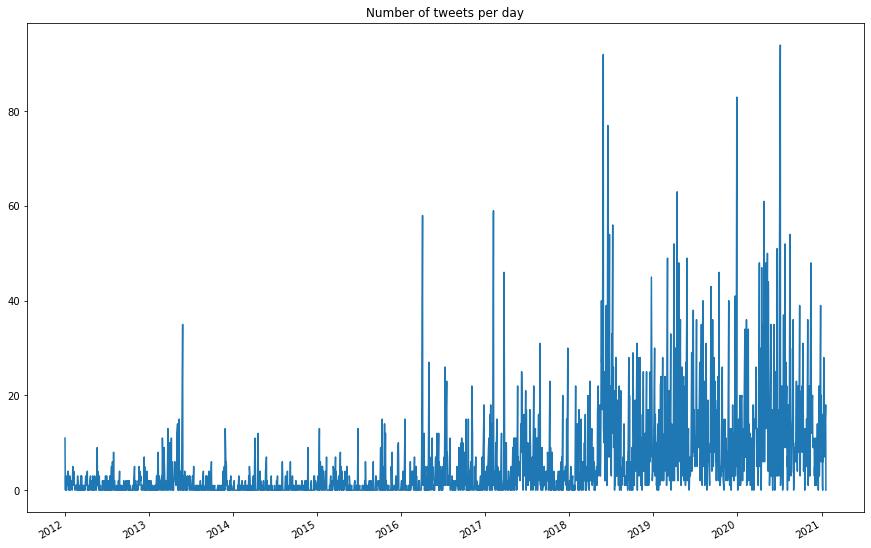

In [38]:
# We determine the min date where we want the charts to run. Prior to this date, not many tweet activity
min_date='2012-01-01'
charts_df=clean_df.loc[min_date:]
charts_df['tweet count'].plot(figsize=(15,10), title='Number of tweets per day')

<AxesSubplot:xlabel='Y_d5_pr_change_diff', ylabel='tweet flag'>

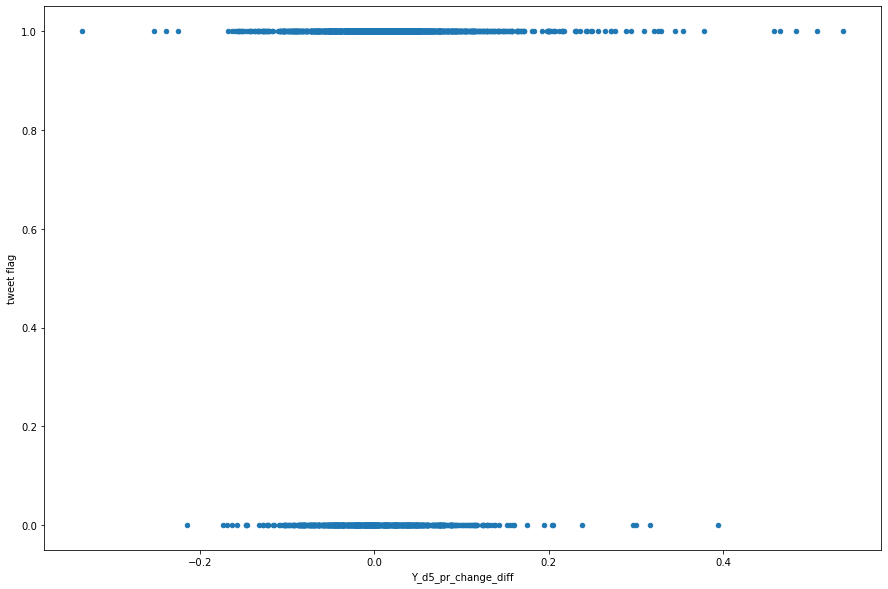

In [39]:
charts_df.plot.scatter(x='Y_d5_pr_change_diff',
                      y='tweet flag',
                      figsize=(15,10)
                      )

In [40]:
charts_df.describe()
charts_df['Y_d1_pr_change_diff'].loc[clean_df['tweet flag']==0].count()

775

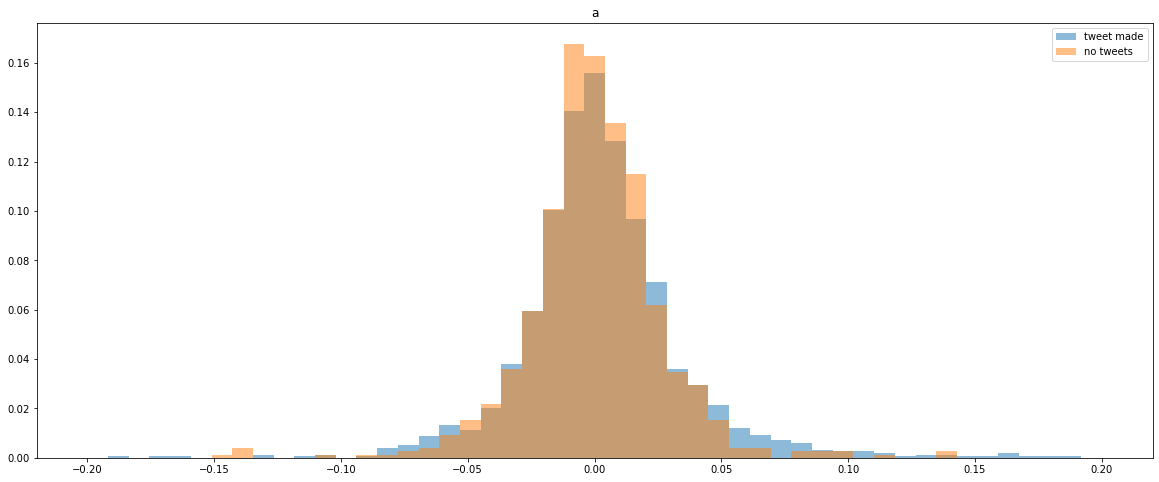

In [41]:
# Histograms of pct change differenctial - 5 days change
x=charts_df['Y_d1_pr_change_diff'].loc[charts_df['tweet flag']==1]
y=charts_df['Y_d1_pr_change_diff'].loc[charts_df['tweet flag']==0]
bins = np.linspace(-0.2, 0.2)

pyplot.figure(figsize=(20,8))
pyplot.title('a')
pyplot.hist(x, bins, alpha=0.5, label='tweet made',weights = np.ones_like(x) / len(x))
pyplot.hist(y, bins, alpha=0.5, label='no tweets',weights = np.ones_like(y) / len(y))
pyplot.legend(loc='upper right')
pyplot.show()

In [42]:
x.count()

1502

In [43]:
y.count()

775

In [44]:
x.mean()

0.002982318318565172

In [45]:
y.mean()

-0.00011209673290149922

In [ ]:
# Export csv files with stock prices
# file_name="test1.csv"
# output_file = Path(f"../Resources/{file_name}")
# clean_df.to_csv(f"{output_file}")